In [1]:
import pandas as pd 

data = pd.read_csv('./news_contents.csv')
data.head()

,title,url,origin,content
0,想開咖啡廳，不是只要沖咖啡而已！專家曝8大開店地雷，經營美店絕對比你想的還要累-風傳媒,https://www.storm.mg/lifestyle/3689600?page=1,https://www.storm.mg,"[' 人氣 ', '現正熱映中', '熱門文章', '熱門分享', ' 許多人夢想開咖啡廳創..."
1,指揮中心公佈配戴口罩放寬規定，爬山、海邊活動可不用戴口罩 | T客邦,https://www.techbang.com/posts/90420-the-comma...,https://www.techbang.com,"[' janus 發表於 2021年10月03日 15 28 收藏此文 ', '指揮中心今天..."
2,中國東北限電限到只有 2G 訊號，紅綠燈罷工、行動支付不能用連買飯都困難 | T客邦,https://www.techbang.com/posts/90380-there-are...,https://www.techbang.com,"[' 鳯凰網 發表於 2021年10月03日 15 00 收藏此文 ', '中國東北多地傳出..."
3,NETSCOUT威脅情報報告：DDoS攻擊達540萬次較去年同期增11% | T客邦,https://www.techbang.com/posts/90274-netscout-...,https://www.techbang.com,"[' Hsuann 發表於 2021年10月03日 11 00 收藏此文 ', '友訊代理品..."
4,休旅車華麗變身「音樂戰車」，紐約街頭「惡名昭彰」的多明尼加汽車音響文化 - The News...,https://www.thenewslens.com/article/157149,https://www.thenewslens.com,"[' TNL編輯部國際編譯專用帳號 發表國際新聞的分析與整理 ', ' 這個文化源於對聲音和..."


In [2]:
news = list(data['content'].values)                                 
print(len(news), type(news))

500 <class 'list'>


In [3]:
import jieba
import jieba.analyse

# 移除停用詞
stopwords=[]

with open('cn_stopwords.txt', 'r', encoding='utf-8') as f:             # 使用從網路上抓來的停用詞表
    for data in f.readlines():
        data = data.strip()
        stopwords.append(data)
        
len(stopwords)

746

In [4]:
# jieba 分詞
#預設模式

import time

print('Jobs just begin!')

remained_news = []

startTime=time.time()

for n in news:
    
    seg = jieba.cut(n, cut_all=False) # 分詞後去除停用詞, 然後再重組回文章
   
    try:
        remained_news.append(''.join(list(filter(lambda a: a not in stopwords and a != '\n', seg))))
    
    except Exception as e:                         
        print(e)             # 若有 'nan' 的項目會引發錯誤  
        print(news.index(n))  # 取得序號再次確認新聞內容是否有問題

endTime=time.time()

print('Take time: ', endTime-startTime, 's')
print('Length of result:',len(remained_news))
print('All jobs Done!')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\VINCEN~1\AppData\Local\Temp\jieba.cache


Jobs just begin!


Loading model cost 1.772 seconds.
Prefix dict has been built successfully.


Take time:  70.62813258171082 s
Length of result: 500
All jobs Done!


In [5]:
# 關鍵字 tfidf-預設模式
keywords = []

startTime=time.time()

for n in remained_news:
    keywords.append(jieba.analyse.extract_tags(n, topK=20, withWeight=False))

#for j in keywords:
    #print(j,'\n')
    
    
endTime=time.time()

print('Take time: ', endTime-startTime, 's')
print('Length of result:',len(keywords))
print('All jobs Done!')

Take time:  28.84628701210022 s
Length of result: 500
All jobs Done!


In [6]:
#keywords

keyword_text='' #要製作文字雲，來源文本不能是list形式

for lst in keywords:
    for item in lst:
        keyword_text+=' '+item

In [28]:
# 把這 500 篇新聞內容做成文字雲

#def plt_wordcloud(content, maskpath):

def plt_wordcloud(content):   # 把文章內容轉文字雲
    
    from wordcloud import WordCloud
    import jieba
    import matplotlib.pyplot as plt
    from PIL import Image 
    import numpy as np
    %matplotlib inline
    
    words = jieba.cut(content, cut_all=False)
    
    all_words = ''
    for word in words:
        all_words += ' '+word
    
    #mask = np.array(Image.open(maskpath))
    
    wcloud = WordCloud(width=500, height=500, background_color='black', mask=None, 
                       min_font_size=8, font_path='C:/Windows/Fonts/msjh.ttc').generate(all_words)
    
    plt.figure(figsize=(20, 10), facecolor=None)
    plt.imshow(wcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    
    plt.show()

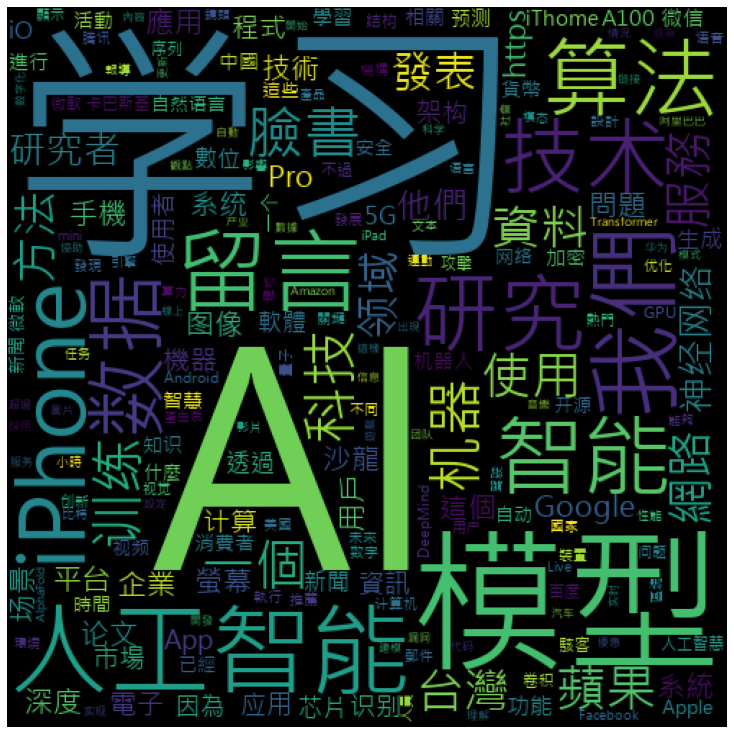

In [29]:
plt_wordcloud(keyword_text)